<a href="https://colab.research.google.com/github/MCastro07/PortafolioDA3/blob/main/Proyecto2M%C3%B3nicaCastro_Data_Analytics_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2 - Proceso de generación de valor por extración de datos


### ✨*Mónica Alexia Castro Ortega*

Este proyecto esta diseñado para que usted pueda:

1.   Poner en práctica los conocimientos específicos del leguaje Python y las bibliotecas de Pandas, Matplotlib con Seaborn y numpy
2.   Generar una plantilla reutilizable de un proceso de limpieza, consolidación y carga de datos
3.   Aplicar los conocimientos analizando una base de datos del mundo real.

Utilizaremos el dataset superstore que puede encontar en la carpeta de datasets de Google Drive. Este es la información de ventas y ordenes de cuatro años de una tienda en línea y le permitirá hacer análisis de ventas, categorías etc.

Mantenga en mente que algunos errores en carga y limpieza de datos pueden surgir. Su tarea es identificarlos y sobreponerse a ellos.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/DataSources/superstore.zip"

Archive:  /content/drive/MyDrive/DataSources/superstore.zip
 extracting: superstore/superstore_dataset2011-2015-1.csv  
 extracting: superstore/superstore_dataset2011-2015-2.csv  
 extracting: superstore/superstore_dataset2011-2015-3.csv  
 extracting: superstore/superstore_dataset2011-2015-4.csv  
 extracting: superstore/superstore_dataset2011-2015-5.csv  
 extracting: superstore/superstore_dataset2011-2015-8.csv  


# Importar Datos e Identificar variables a limpiar

1. Importar los dataset a variables.

In [ ]:
dataset1 = pd.read_csv('/content/superstore/superstore_dataset2011-2015-1.csv', encoding = 'latin-1')
dataset2 = pd.read_csv('/content/superstore/superstore_dataset2011-2015-2.csv', encoding = 'latin-1')
dataset3 = pd.read_csv('/content/superstore/superstore_dataset2011-2015-3.csv', encoding = 'latin-1')
dataset4 = pd.read_csv('/content/superstore/superstore_dataset2011-2015-4.csv', encoding = 'latin-1')
dataset5 = pd.read_csv('/content/superstore/superstore_dataset2011-2015-5.csv', encoding = 'latin-1')
dataset8 = pd.read_csv('/content/superstore/superstore_dataset2011-2015-8.csv', encoding = 'latin-1')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
dataset1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,38172,US-2013-121013,6/9/2013,11/9/2013,Standard Class,MM-17920,Michael Moore,Consumer,Chesapeake,Virginia,United States,23320.0,US,South,OFF-LA-10004545,Office Supplies,Labels,Avery 50,25.060,2,0.0,11.7782,3.26,High
10256,1431,MX-2013-107097,6/9/2013,11/9/2013,Standard Class,TC-21145,Theresa Coyne,Corporate,Bucaramanga,Santander,Colombia,NaN,LATAM,South,OFF-EN-10002855,Office Supplies,Envelopes,"Kraft Interoffice Envelope, Security-Tint",65.760,2,0.0,29.5600,3.18,Medium
10257,38846,CA-2013-136595,6/9/2013,8/9/2013,First Class,EM-13825,Elizabeth Moffitt,Corporate,Houston,Texas,United States,77036.0,US,Central,FUR-FU-10004671,Furniture,Furnishings,"Executive Impressions 12"" Wall Clock",21.204,3,0.6,-11.6622,3.16,High
10258,36679,CA-2013-149195,6/9/2013,8/9/2013,Second Class,DM-13525,Don Miller,Corporate,Houston,Texas,United States,77070.0,US,Central,OFF-FA-10001843,Office Supplies,Fasteners,Staples,15.808,8,0.2,5.3352,2.97,High


In [ ]:
dataset1.shape, dataset2.shape, dataset3.shape, dataset4.shape, dataset5.shape, dataset8.shape

((10260, 24), (10260, 24), (10260, 24), (10260, 24), (10250, 24), (10260, 24))

2. Concatenar todos los datasets en una sola variable.

In [ ]:
super_dataset = pd.concat([dataset1, dataset2, dataset3, dataset4, dataset5, dataset8], axis=0)

In [ ]:
super_dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.00,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.10,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.00,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.50,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.10,37.770,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,528,MX-2013-168858,19-06-2013,24-06-2013,Standard Class,CA-12775,Cynthia Arntzen,Consumer,Santiago de Cuba,Santiago de Cuba,Cuba,NaN,LATAM,Caribbean,FUR-BO-10003631,Furniture,Bookcases,"Safco Stackable Bookrack, Mobile",198.640,2,0.00,51.640,22.47,High
10256,25903,IN-2013-39231,19-06-2013,24-06-2013,Second Class,KB-16585,Ken Black,Corporate,Devonport,Tasmania,Australia,NaN,APAC,Oceania,TEC-MA-10002340,Technology,Machines,"Konica Receipt Printer, White",217.188,2,0.10,57.888,22.01,Medium
10257,21801,IN-2013-78081,19-06-2013,23-06-2013,Standard Class,CS-12355,Christine Sundaresam,Consumer,Manila,National Capital,Philippines,NaN,APAC,Southeast Asia,TEC-PH-10004281,Technology,Phones,"Samsung Audio Dock, Cordless",381.780,3,0.25,91.620,17.81,Medium
10258,29659,IN-2013-53455,19-06-2013,23-06-2013,Standard Class,CR-12730,Craig Reiter,Consumer,Moradabad,Uttar Pradesh,India,NaN,APAC,Central Asia,TEC-PH-10002154,Technology,Phones,"Cisco Headset, Full Size",179.460,2,0.00,43.020,12.58,Medium


3. Identificar qué se debe limpiar.

In [ ]:
super_dataset.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,61550.000000,11899.000000,61550.000000,61550.000000,61550.000000,61550.000000,61550.000000
mean,25609.792851,55128.031599,248.323138,3.482924,0.143001,28.714501,26.616875
std,14813.424323,32085.202363,498.100427,2.281280,0.212477,175.320805,58.027798
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12802.250000,22801.000000,30.930000,2.000000,0.000000,0.000000,2.620000
50%,25552.500000,57103.000000,85.320000,3.000000,0.000000,9.180000,7.810000
75%,38468.750000,90008.000000,251.959000,5.000000,0.200000,36.810000,24.637500
max,51290.000000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
super_dataset.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       49651
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


> *Se deben rellenar los vacíos o eliminar completamente la columna (**Postal Code**)*


In [ ]:
super_dataset.duplicated().sum()

10260


> *Existen 10260 duplicados, que deben ser eliminados*

# Limpieza de Datos

1. Eliminar la columna Postal Code.

In [ ]:
super_dataset.drop('Postal Code', axis = 1, inplace=True)

In [ ]:
super_dataset.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

2. Eliminar los duplicados.

In [ ]:
super_dataset['Row ID'].nunique()

51290

In [ ]:
super_dataset.groupby(['Row ID']).count()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51286,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
51287,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
51288,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
super_dataset = super_dataset.drop_duplicates(subset=["Row ID"])

In [ ]:
super_dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
10246,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
10247,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
10248,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium




> Se hizo una eliminación de duplicados de acuerdo a la fila *Row ID*, pero se realizará una concatenación de otras columnas que se consideren únicas, para determinar si no existen más duplicados con diferentes *Row ID*



In [ ]:
super_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 10249
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51290 non-null  object 
 17  Sales           51290 non-null 

In [ ]:
super_dataset['Sales'] = super_dataset.loc[:,['Sales']].astype(str)

<ipython-input-20-8a82d5737b34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_dataset['Sales'] = super_dataset.loc[:,['Sales']].astype(str)


In [ ]:
super_dataset['Sales'].dtypes

dtype('O')

In [ ]:
super_datasetcomp = super_dataset.copy()

In [ ]:
super_datasetcomp['Columnas unicas'] = super_datasetcomp['Order ID'] + '-' + super_datasetcomp['Customer Name'] + '-' + super_datasetcomp['Sales']

In [ ]:
dupes = super_datasetcomp[super_datasetcomp['Columnas unicas'].duplicated(keep=False)]

In [ ]:
dupes

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Columnas unicas
773,27443,ID-2011-54176,3/5/2011,9/5/2011,Standard Class,AR-10510,Andrew Roberts,Consumer,Armidale,New South Wales,Australia,APAC,Oceania,OFF-BI-10000168,Office Supplies,Binders,"Cardinal Hole Reinforcements, Recycled",15.39,3,0.10,2.5200,0.70,Medium,ID-2011-54176-Andrew Roberts-15.39
774,27445,ID-2011-54176,3/5/2011,9/5/2011,Standard Class,AR-10510,Andrew Roberts,Consumer,Armidale,New South Wales,Australia,APAC,Oceania,OFF-BI-10000168,Office Supplies,Binders,"Cardinal Hole Reinforcements, Recycled",15.39,3,0.10,2.5200,0.64,Medium,ID-2011-54176-Andrew Roberts-15.39
1305,34573,CA-2011-102988,5/4/2011,9/4/2011,Second Class,GM-14695,Greg Maxwell,Corporate,Alexandria,Virginia,United States,US,South,OFF-AR-10004757,Office Supplies,Art,Crayola Colored Pencils,22.96,7,0.00,7.5768,3.39,High,CA-2011-102988-Greg Maxwell-22.96
1308,34576,CA-2011-102988,5/4/2011,9/4/2011,Second Class,GM-14695,Greg Maxwell,Corporate,Alexandria,Virginia,United States,US,South,OFF-AR-10000127,Office Supplies,Art,Newell 321,22.96,7,0.00,6.6584,2.45,High,CA-2011-102988-Greg Maxwell-22.96
1586,18467,ES-2011-2464932,6/6/2011,9/6/2011,First Class,BS-11380,Bill Stewart,Corporate,Oyonnax,Rhône-Alpes,France,EU,Central,OFF-SU-10004524,Office Supplies,Supplies,"Kleencut Box Cutter, High Speed",103.95,3,0.00,0.0000,27.73,High,ES-2011-2464932-Bill Stewart-103.95
1591,18466,ES-2011-2464932,6/6/2011,9/6/2011,First Class,BS-11380,Bill Stewart,Corporate,Oyonnax,Rhône-Alpes,France,EU,Central,OFF-BI-10000289,Office Supplies,Binders,"Wilson Jones Binder Covers, Recycled",103.95,9,0.00,24.8400,13.11,High,ES-2011-2464932-Bill Stewart-103.95
2973,17219,ES-2011-4665208,10/12/2011,13-12-2011,First Class,BP-11185,Ben Peterman,Corporate,London,England,United Kingdom,EU,North,OFF-BI-10000368,Office Supplies,Binders,"Avery Binder Covers, Durable",33.939,3,0.10,1.0890,12.68,Critical,ES-2011-4665208-Ben Peterman-33.939
2980,17221,ES-2011-4665208,10/12/2011,13-12-2011,First Class,BP-11185,Ben Peterman,Corporate,London,England,United Kingdom,EU,North,OFF-FA-10001551,Office Supplies,Fasteners,"Stockwell Thumb Tacks, 12 Pack",33.939,3,0.10,7.8390,4.77,Critical,ES-2011-4665208-Ben Peterman-33.939
4529,8003,MX-2012-137561,3/12/2012,7/12/2012,Standard Class,LS-17200,Luke Schmidt,Corporate,Rancagua,O'Higgins,Chile,LATAM,South,FUR-CH-10000892,Furniture,Chairs,"SAFCO Executive Leather Armchair, Red",615.24,2,0.00,12.2800,68.73,Medium,MX-2012-137561-Luke Schmidt-615.24
4532,8007,MX-2012-137561,3/12/2012,7/12/2012,Standard Class,LS-17200,Luke Schmidt,Corporate,Rancagua,O'Higgins,Chile,LATAM,South,FUR-CH-10000892,Furniture,Chairs,"SAFCO Executive Leather Armchair, Red",615.24,2,0.00,12.2800,54.91,Medium,MX-2012-137561-Luke Schmidt-615.24


In [ ]:
super_dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
10246,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.0,0.4200,0.49,Medium
10247,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.4,3,0.0,12.3600,0.35,Medium
10248,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.12,1,0.0,0.5600,0.20,Medium


# Creación de nueva base de datos en Google Drive

In [ ]:
super_dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/super_dataset.csv')

# Explorando datos

Conectar a la nueva base de datos

In [ ]:
superstore = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/super_dataset.csv')

In [ ]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51290 non-null  int64  
 1   Row ID          51290 non-null  int64  
 2   Order ID        51290 non-null  object 
 3   Order Date      51290 non-null  object 
 4   Ship Date       51290 non-null  object 
 5   Ship Mode       51290 non-null  object 
 6   Customer ID     51290 non-null  object 
 7   Customer Name   51290 non-null  object 
 8   Segment         51290 non-null  object 
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

1. Eliminar columna *Unnamed*

In [ ]:
superstore.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


2. Cambiar el formato de las columnas *Order Date* y *Ship Date*

In [ ]:
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'], infer_datetime_format=True, format = '%B %d, %Y')

In [ ]:
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'], infer_datetime_format=True, format = '%B %d, %Y')

In [ ]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [ ]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

# Analizando Categorías, tendencias, medias y creando valor

Su función será crear un "deep dive" que explorara 2 a 4 preguntas de negocios que pueda hacer con los datos: ¿Cuál es el mejor día de la semana de ventas? etc. Como mínimo su análisis debe incluir:

- Comparar dos variables con al menos una segmentación por categoría
- Analizar gráficamente multiples variables numéricas
- Plot charts, Gráficos de tendencia y Barra con su análisis de que significa
- Utilizar las ideas anteriores como sea necesario para cada pregunta de negocio.




> *1. ¿Cúal es la cantidad de ventas anuales por categoría?*


In [ ]:
categoria_anual_2011 = pd.DataFrame(superstore[((superstore['Order Date'] >= '2011-01-01') & (superstore['Order Date'] <= '2011-12-31'))].groupby(by=['Category'])['Quantity'].sum().sort_values(ascending=False).reset_index(name='Cantidad de ventas (2011)'))

In [ ]:
categoria_anual_2011

,Category,Cantidad de ventas (2011)
0,Office Supplies,18976
1,Furniture,6309
2,Technology,6158


In [ ]:
categoria_anual_2012 = pd.DataFrame(superstore[((superstore['Order Date'] >= '2012-01-01') & (superstore['Order Date'] <= '2012-12-31'))].groupby(by=['Category'])['Quantity'].sum().sort_values(ascending=False).reset_index(name='Cantidad de ventas (2012)'))
categoria_anual_2013 = pd.DataFrame(superstore[((superstore['Order Date'] >= '2013-01-01') & (superstore['Order Date'] <= '2013-12-31'))].groupby(by=['Category'])['Quantity'].sum().sort_values(ascending=False).reset_index(name='Cantidad de ventas (2013)'))
categoria_anual_2014 = pd.DataFrame(superstore[((superstore['Order Date'] >= '2014-01-01') & (superstore['Order Date'] <= '2014-12-31'))].groupby(by=['Category'])['Quantity'].sum().sort_values(ascending=False).reset_index(name='Cantidad de ventas (2014)'))

In [ ]:
df1 = pd.merge(categoria_anual_2011, categoria_anual_2012, on= 'Category')
df2 = pd.merge(df1, categoria_anual_2013, on= 'Category')
categoria_anual = pd.merge(df2, categoria_anual_2014, on= 'Category')

In [ ]:
categoria_anual

,Category,Cantidad de ventas (2011),Cantidad de ventas (2012),Cantidad de ventas (2013),Cantidad de ventas (2014)
0,Office Supplies,18976,23135,29147,36924
1,Furniture,6309,7279,9700,11666
2,Technology,6158,7697,9289,12032


Se procede a crear un gráfico de barras, para mejorar la visualización de la información.

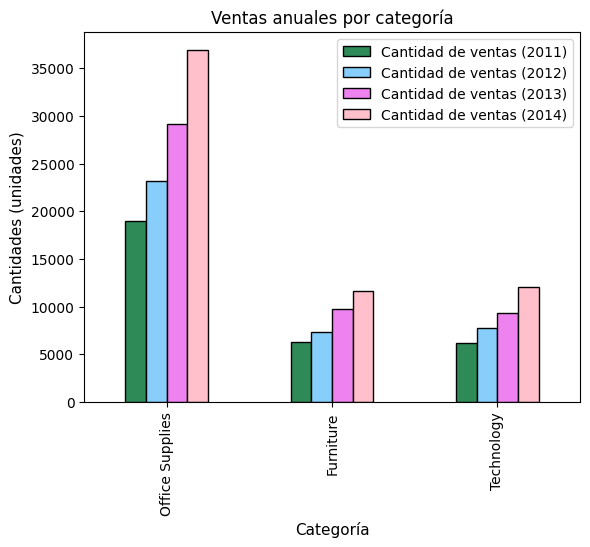

In [ ]:
categoria_anual.plot(kind='bar',x='Category',title='Ventas anuales por categoría', color=['seagreen',
'lightskyblue','violet', 'pink'], edgecolor='Black', linewidth = 1, linestyle='-')

plt.xlabel('Categoría', fontsize=11)
plt.ylabel('Cantidades (unidades)', fontsize=11)
plt.show()

**ANÁLISIS:** Se puede observar que cada categoría presenta un incremento anual en la cantidad de ventas, siendo el año 2014 el más activo. Además, se puede observar que la categoría más famosa es la de *Office Supplies*.



> *2. ¿Cuáles son los cinco productos más vendidos dentro de la categoría de Office Supplies, en el año 2014?*




In [ ]:
productos_2014 = pd.DataFrame(superstore[(superstore['Category']=='Office Supplies') & ((superstore['Order Date'] >= '2014-01-01') & (superstore['Order Date'] <= '2014-12-31'))].groupby(by=['Product Name'])['Quantity'].sum().sort_values(ascending=False).head(5).reset_index(name='Cantidad'))

In [ ]:
productos_2014

,Product Name,Cantidad
0,Staples,271
1,"Stockwell Paper Clips, Assorted Sizes",135
2,"Cardinal Index Tab, Clear",105
3,"Eldon File Cart, Single Width",98
4,"Rogers File Cart, Single Width",94


Se procede a crear un gráfico de barras, para mejorar la visualización de la información.

Text(0, 0.5, 'Productos de Office Supplies')

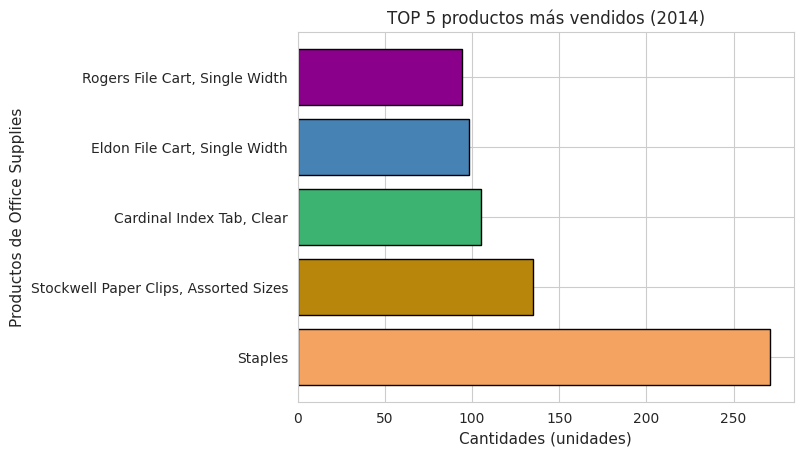

In [ ]:
sns.set_style("whitegrid")
plt.barh(productos_2014['Product Name'], productos_2014['Cantidad'], color=['sandybrown', 'darkgoldenrod', 'mediumseagreen', 'steelblue', 'darkmagenta'], edgecolor='Black', linewidth = 1, linestyle='-')

plt.title('TOP 5 productos más vendidos (2014)')
plt.xlabel('Cantidades (unidades)', fontsize=11)
plt.ylabel('Productos de Office Supplies', fontsize=11)

**ANÁLISIS:** Se puede observar que el producto más vendido de la categoría *Office Supplies* fueron las engrapadoras, con una cantidad final de 271 unidades vendidas en todo el año.


> *3. ¿Cuáles son los países que generaron mayores ingresos monetarios para la compañía?*

In [ ]:
ventas_paises = pd.DataFrame(superstore.groupby(by=['Country'])['Sales'].sum().sort_values(ascending=False).head(5).reset_index(name='Ventas'))

In [ ]:
ventas_paises

,Country,Ventas
0,United States,2.297201e+06
1,Australia,9.252359e+05
2,France,8.589311e+05
3,China,7.005620e+05
4,Germany,6.288400e+05


Se procede a crear un gráfico, para mejorar la visualización de la información.

Text(0, 0.5, 'Ventas (en millones)')

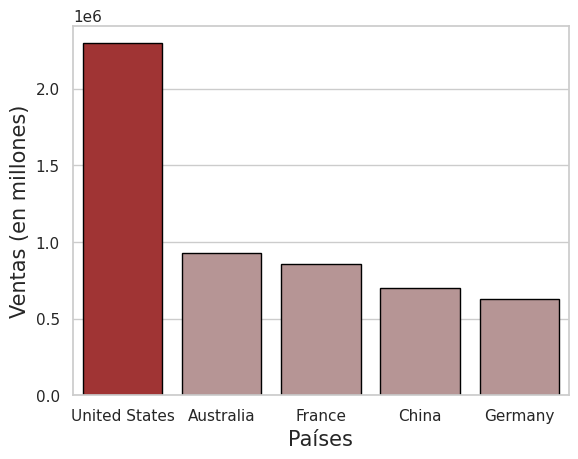

In [ ]:
ax = sns.set(style="whitegrid", color_codes=True)
cols = ['rosybrown' if (x < max(ventas_paises.Ventas)) else 'firebrick' for x in ventas_paises.Ventas]
sns.barplot(ventas_paises, x="Country", y="Ventas",   linewidth=1, edgecolor='0', palette=cols)

plt.xlabel('Países', fontsize=15)
plt.ylabel('Ventas (en millones)', fontsize=15)

**ANÁLISIS:** Se puede observar que Estados Unidos es el país que más ingresos le trae a la compañía, ya sea porque se hacen más ventas ahí o porque se compran los productos más caros ahí. Australia, Francia, China y Alemania se encuentran en un rango parecido, pero Estados Unidos los sobrepasa por más del doble.

# Conclusiones

Considero que a lo largo de este proyecto, he logrado comprender un poco mejor las distintas situaciones con las que se deben de lidiar durante el manejo y limpieza de las bases de datos. Además, he llegado a entender lo siguiente:
- Cuando se va a buscar elementos duplicados dentro de la base de datos, python ofrece dos comandos muy buenos que vuelven el proceso mucho más sencillo. Sin embargo, es importante comprobar con la concatenación de columnas que contengan datos únicos.
- Las librerías *matplotlib* y *seaborn* son una gran herramienta para la visualización de datos. Considero que debo profundizar más en ellas, ya que ofrecen una gran variedad de funciones.
- La visualización de datos es una parte muy importante para el análisis de éstos, ya que hacen la información más digerible y permiten identificar fácilmente los comportamientos o tendencias.